# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

A base escolhida é entitulada "Suicide Rates Overview 1985 to 2016" (in, https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), e, seu objeto é a análise comparativa de informações sócio-econômicas com as taxas de sucicídio dos países no período de 1985 a 2016. De acordo com a Organização Mundial de Saúde, um suicídio ocorre a cada 40 segundos no mundo, ou seja, tais morte já se tornaram um problema de saúde pública, e como tal, devem ser prevenidas através de políticas pública, com programas de saúde e educação, cuja formulação pode ser embasada através dos dados em questão.


*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


*Descrição da base e suas variáveis*

A base de dados é composta por 12 colunas, denominadas: "country" (país),	"year" (ano),	"sex" (sexo),	"age"(idade),	"suicides_no" (nº suicídio),	"population" (população),	"suicides/100k pop" (nº suicídios a cada 100 mil habitantes),	"country-year" (país-ano),	"HDI for year" (IDH por ano),	"gdp_for_year" (PIB por ano),	"gdp_per_capita" (PIB per capita),	"generation" (geração). A feature "generation" foi calculada com base na  média de agrupamento etário. As variáveis "age", "suicides_no", "population", "suicides/100k pop" são discretas; já as variáveis "HDI for year", "gdp_for_year", "gdp_per_capita" são contínuas.

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = "/content/drive/My Drive/Colab Notebooks/suicide-rates-overview-1985-to-2016.csv"

Mounted at /content/drive


In [0]:
df = pd.read_csv(arquivo_base)

In [0]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


*   Avaliação descritiva da base



In [0]:
#Quantidade de linhas e colunas
df.shape

(27820, 12)

In [0]:
#Quantas e quais features
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [0]:
#Tipos de dados
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [0]:
#Informações estatísticas da base de dados
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000




* Pre-processamento



- Tratamento de valores ausentes por eliminação ou substituição

In [0]:
# Verificação, com o uso do método isnull(), de valores faltantes ou nulos 
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [0]:
#Excluindo a coluna "HDI for year", pois, de um total de 27820 registros, 19456 são nulos
df.drop(['HDI for year'], axis=1, inplace=True)

In [0]:
#Revisando as colunas
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

- Conversão do tipo de dados

In [0]:
#Converter os dados da coluna "gdp_for_year" de object para float
df["gdp_for_year"]=df["gdp_for_year"].apply(lambda x : x.replace(',',''))

In [0]:
df = df.astype({"gdp_for_year": float})

In [0]:
#Revisando os tipos de dados das colunas
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
gdp_for_year         float64
gdp_per_capita         int64
generation            object
dtype: object

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis


- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

In [0]:
#Variável contínua: "age" (idade)
df["age"].value_counts() / df.shape[0]

35-54 years    0.166858
75+ years      0.166858
15-24 years    0.166858
55-74 years    0.166858
25-34 years    0.166858
5-14 years     0.165708
Name: age, dtype: float64

In [0]:
df.shape[0]

27820

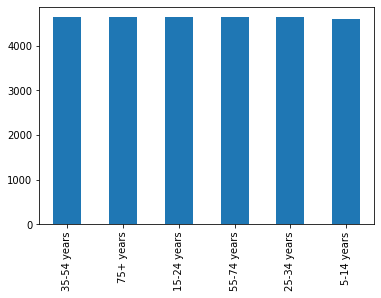

In [0]:
df["age"].value_counts(dropna=False).plot(kind="bar")

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.

In [0]:
#Variável discreta: "sex" (sexo)
df.groupby("sex").size() / df.shape[0]

sex
female    0.5
male      0.5
dtype: float64

In [0]:
pd.value_counts(df['sex'])

female    13910
male      13910
Name: sex, dtype: int64

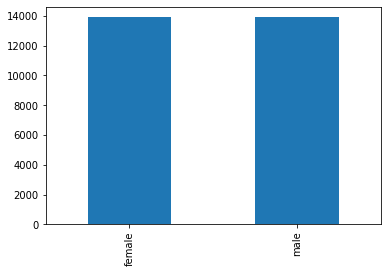

In [0]:
df["sex"].value_counts(dropna=False).plot(kind="bar")

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
#Divisão do "gdp_per_capita" (PIB per capta) em 3 "grupos". Para cada um desses grupos, será apresentada a distribuição das variáveis "idade" e "sexo"
bins = [251.000000,3446.000,24874.000000,126352.000000]
labels = ["Subdesenvolvido", "Em desenvolvimento", "Desenvolvido"]
df["Status_PIB_per_capta"] = pd.cut(df["gdp_per_capita"], bins, labels=labels)

In [0]:
df[["Status_PIB_per_capta", "gdp_per_capita"]].head(10)

,Status_PIB_per_capta,gdp_per_capita
0,Subdesenvolvido,796
1,Subdesenvolvido,796
2,Subdesenvolvido,796
3,Subdesenvolvido,796
4,Subdesenvolvido,796
5,Subdesenvolvido,796
6,Subdesenvolvido,796
7,Subdesenvolvido,796
8,Subdesenvolvido,796
9,Subdesenvolvido,796


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


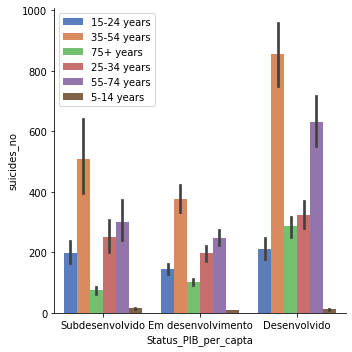

In [0]:
g = sns.factorplot("Status_PIB_per_capta", "suicides_no", "age", data=df, kind="bar", palette="muted", legend=False)
plt.legend();            
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


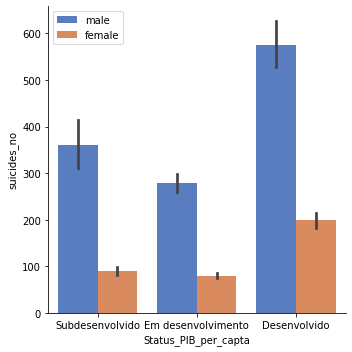

In [0]:
g = sns.factorplot("Status_PIB_per_capta", "suicides_no", "sex", data=df, kind="bar", palette="muted", legend=False)            
plt.legend()
plt.show()

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
# Análise da correlação das variáveis contínuas
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.025240,0.001785
gdp_for_year,0.094529,0.430096,0.710697,0.025240,1.000000,0.303405
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.303405,1.000000


In [0]:
# Análise da correlação das variáveis contínuas e discretas
nao_objetos=[c for c in df.columns if df[c].dtypes != "O"]

In [0]:
categoricos = ["sex", "age", "generation", "Status_PIB_per_capta" ]
dummy = pd.get_dummies(df[nao_objetos+categoricos],columns=categoricos)

In [0]:
dummy.corr()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,Status_PIB_per_capta_Subdesenvolvido,Status_PIB_per_capta_Em desenvolvimento,Status_PIB_per_capta_Desenvolvido,Status_PIB_per_capta_Subdesenvolvido,Status_PIB_per_capta_Em desenvolvimento,Status_PIB_per_capta_Desenvolvido
year,1.000000,-0.004546,0.008850,-0.039037,9.452857e-02,3.391343e-01,0.000000e+00,0.000000e+00,8.950069e-04,8.950069e-04,8.950069e-04,-4.487443e-03,8.950069e-04,8.950069e-04,-6.679006e-02,-3.599554e-01,-1.059631e-01,2.663012e-01,2.124942e-01,7.483409e-02,-3.093208e-01,0.050138,0.252318,-3.093208e-01,0.050138,0.252318
suicides_no,-0.004546,1.000000,0.616162,0.306604,4.300959e-01,6.132975e-02,-1.446292e-01,1.446292e-01,-3.393247e-02,-2.264097e-04,1.417318e-01,-1.142481e-01,5.690311e-02,-5.054385e-02,1.115579e-01,-2.079740e-02,-2.045499e-03,-6.068394e-02,-7.768712e-02,2.257962e-02,-1.108073e-02,-0.070328,0.092574,-1.108073e-02,-0.070328,0.092574
population,0.008850,0.616162,1.000000,0.008285,7.106973e-01,8.150986e-02,1.124208e-02,-1.124208e-02,1.957244e-03,-3.091283e-03,1.432502e-01,-2.614887e-03,5.907927e-03,-1.454164e-01,9.927819e-02,-9.048053e-02,3.602503e-02,-8.556255e-03,-2.966687e-03,-5.512941e-02,-4.715567e-02,-0.064213,0.121710,-4.715567e-02,-0.064213,0.121710
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,2.523964e-02,1.785134e-03,-3.914965e-01,3.914965e-01,-9.131493e-02,-1.485069e-02,5.030404e-02,-2.866600e-01,7.881857e-02,2.629104e-01,4.748842e-02,1.941797e-01,-6.518184e-02,-1.516454e-01,-2.021392e-01,1.609262e-01,6.114344e-03,-0.012801,0.009270,6.114344e-03,-0.012801,0.009270
gdp_for_year,0.094529,0.430096,0.710697,0.025240,1.000000e+00,3.034045e-01,7.757932e-19,-7.757932e-19,-9.294363e-05,-9.294363e-05,-9.294363e-05,4.660067e-04,-9.294363e-05,-9.294363e-05,-5.152816e-03,-3.073453e-02,-1.056527e-02,3.259000e-02,1.680451e-02,3.460061e-03,-1.614511e-01,-0.153957,0.339497,-1.614511e-01,-0.153957,0.339497
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,3.034045e-01,1.000000e+00,-1.336263e-18,1.336263e-18,2.395280e-04,2.395280e-04,2.395280e-04,-1.200961e-03,2.395280e-04,2.395280e-04,-2.189326e-02,-1.133715e-01,-3.653864e-02,1.096130e-01,5.963457e-02,2.088847e-02,-4.586527e-01,-0.309015,0.816204,-4.586527e-01,-0.309015,0.816204
sex_female,0.000000,-0.144629,0.011242,-0.391496,7.757932e-19,-1.336263e-18,1.000000e+00,-1.000000e+00,-1.022705e-17,-2.574155e-18,-4.441890e-19,-3.539215e-18,-1.155962e-18,-1.659019e-19,-2.704459e-19,-2.191646e-18,-6.966389e-19,3.344741e-20,9.027680e-18,2.992825e-19,1.844926e-20,0.000000,0.000000,1.844926e-20,0.000000,0.000000
sex_male,0.000000,0.144629,-0.011242,0.391496,-7.757932e-19,1.336263e-18,-1.000000e+00,1.000000e+00,1.022705e-17,2.574155e-18,4.441890e-19,3.539215e-18,1.155962e-18,1.659019e-19,2.704459e-19,2.191646e-18,6.966389e-19,-3.344741e-20,-9.027680e-18,-2.992825e-19,-1.844926e-20,0.000000,0.000000,-1.844926e-20,0.000000,0.000000
age_15-24 years,0.000895,-0.033932,0.001957,-0.091315,-9.294363e-05,2.395280e-04,-1.022705e-17,1.022705e-17,1.000000e+00,-2.002761e-01,-2.002761e-01,-1.994470e-01,-2.002761e-01,-2.002761e-01,-2.092242e-01,-1.480395e-01,2.392203e-01,-1.057019e-01,3.675149e-01,-2.437279e-01,-2.963165e-04,0.000128,0.000149,-2.963165e-04,0.000128,0.000149
age_25-34 years,0.000895,-0.000226,-0.003091,-0.014851,-9.294363e-05,2.395280e-04,-2.574155e-18,2.574155e-18,-2.002761e-01,1.000000e+00,-2.002761e-01,-1.994470e-01,-2.002761e-01,-2.002761e-01,8.075655e-02,-1.480395e-01,3.692747e-01,-1.057019e-01,-4.002515e-02,-2.437279e-01,-2.963165e-04,0.000128,0.000149,-2.963165e-04,0.000128,0.000149


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


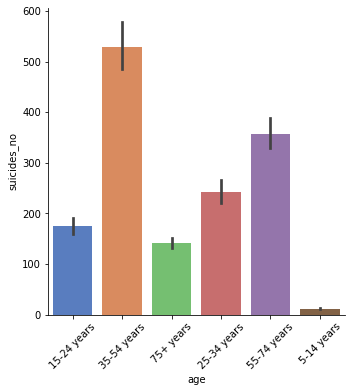

In [0]:
# Primeiro par de variáveis: "suicides_no" x "age"
g = sns.factorplot("age", "suicides_no", data=df, kind="bar", palette="muted", legend=False) 
g.set_xticklabels(rotation=45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


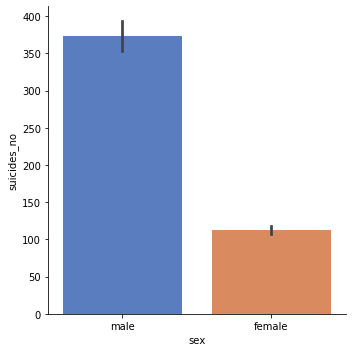

In [0]:
# Segundo par de variáveis: "suicides_no" x "sex"
g = sns.factorplot("sex", "suicides_no", data=df, kind="bar", palette="muted", legend=False) 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


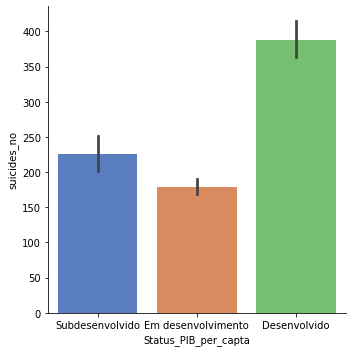

In [0]:
# Terceiro grupo de variáveis: "Status_PIB_per_capta" x "suicides_no"c
g = sns.factorplot("Status_PIB_per_capta", "suicides_no", data=df, kind="bar", palette="muted", legend=False) 
plt.show()


In [0]:
# Grafico "Evolução número de suicídios, nos países, ao longo dos anos" ("suicides_no" x "country" x "year")
by_suicides_no = (df
            .groupby('suicides_no')
             .filter(lambda x : len(x) > 2)
             .groupby(['country', 'year'])
             .size()
            .unstack()
           )
by_suicides_no

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,12.0,12.0,12.0,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,12.0,12.0,12.0,12.0,NaN
Argentina,12.0,11.0,12.0,12.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,11.0,12.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,11.0,12.0,12.0,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,10.0
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,10.0,10.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,11.0,10.0,11.0,12.0,10.0,11.0,11.0,11.0,12.0,10.0,10.0,11.0,10.0,10.0,11.0,11.0,12.0,11.0,NaN
United States,4.0,2.0,4.0,5.0,5.0,4.0,6.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,6.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,3.0,3.0,4.0,4.0,5.0,4.0,NaN


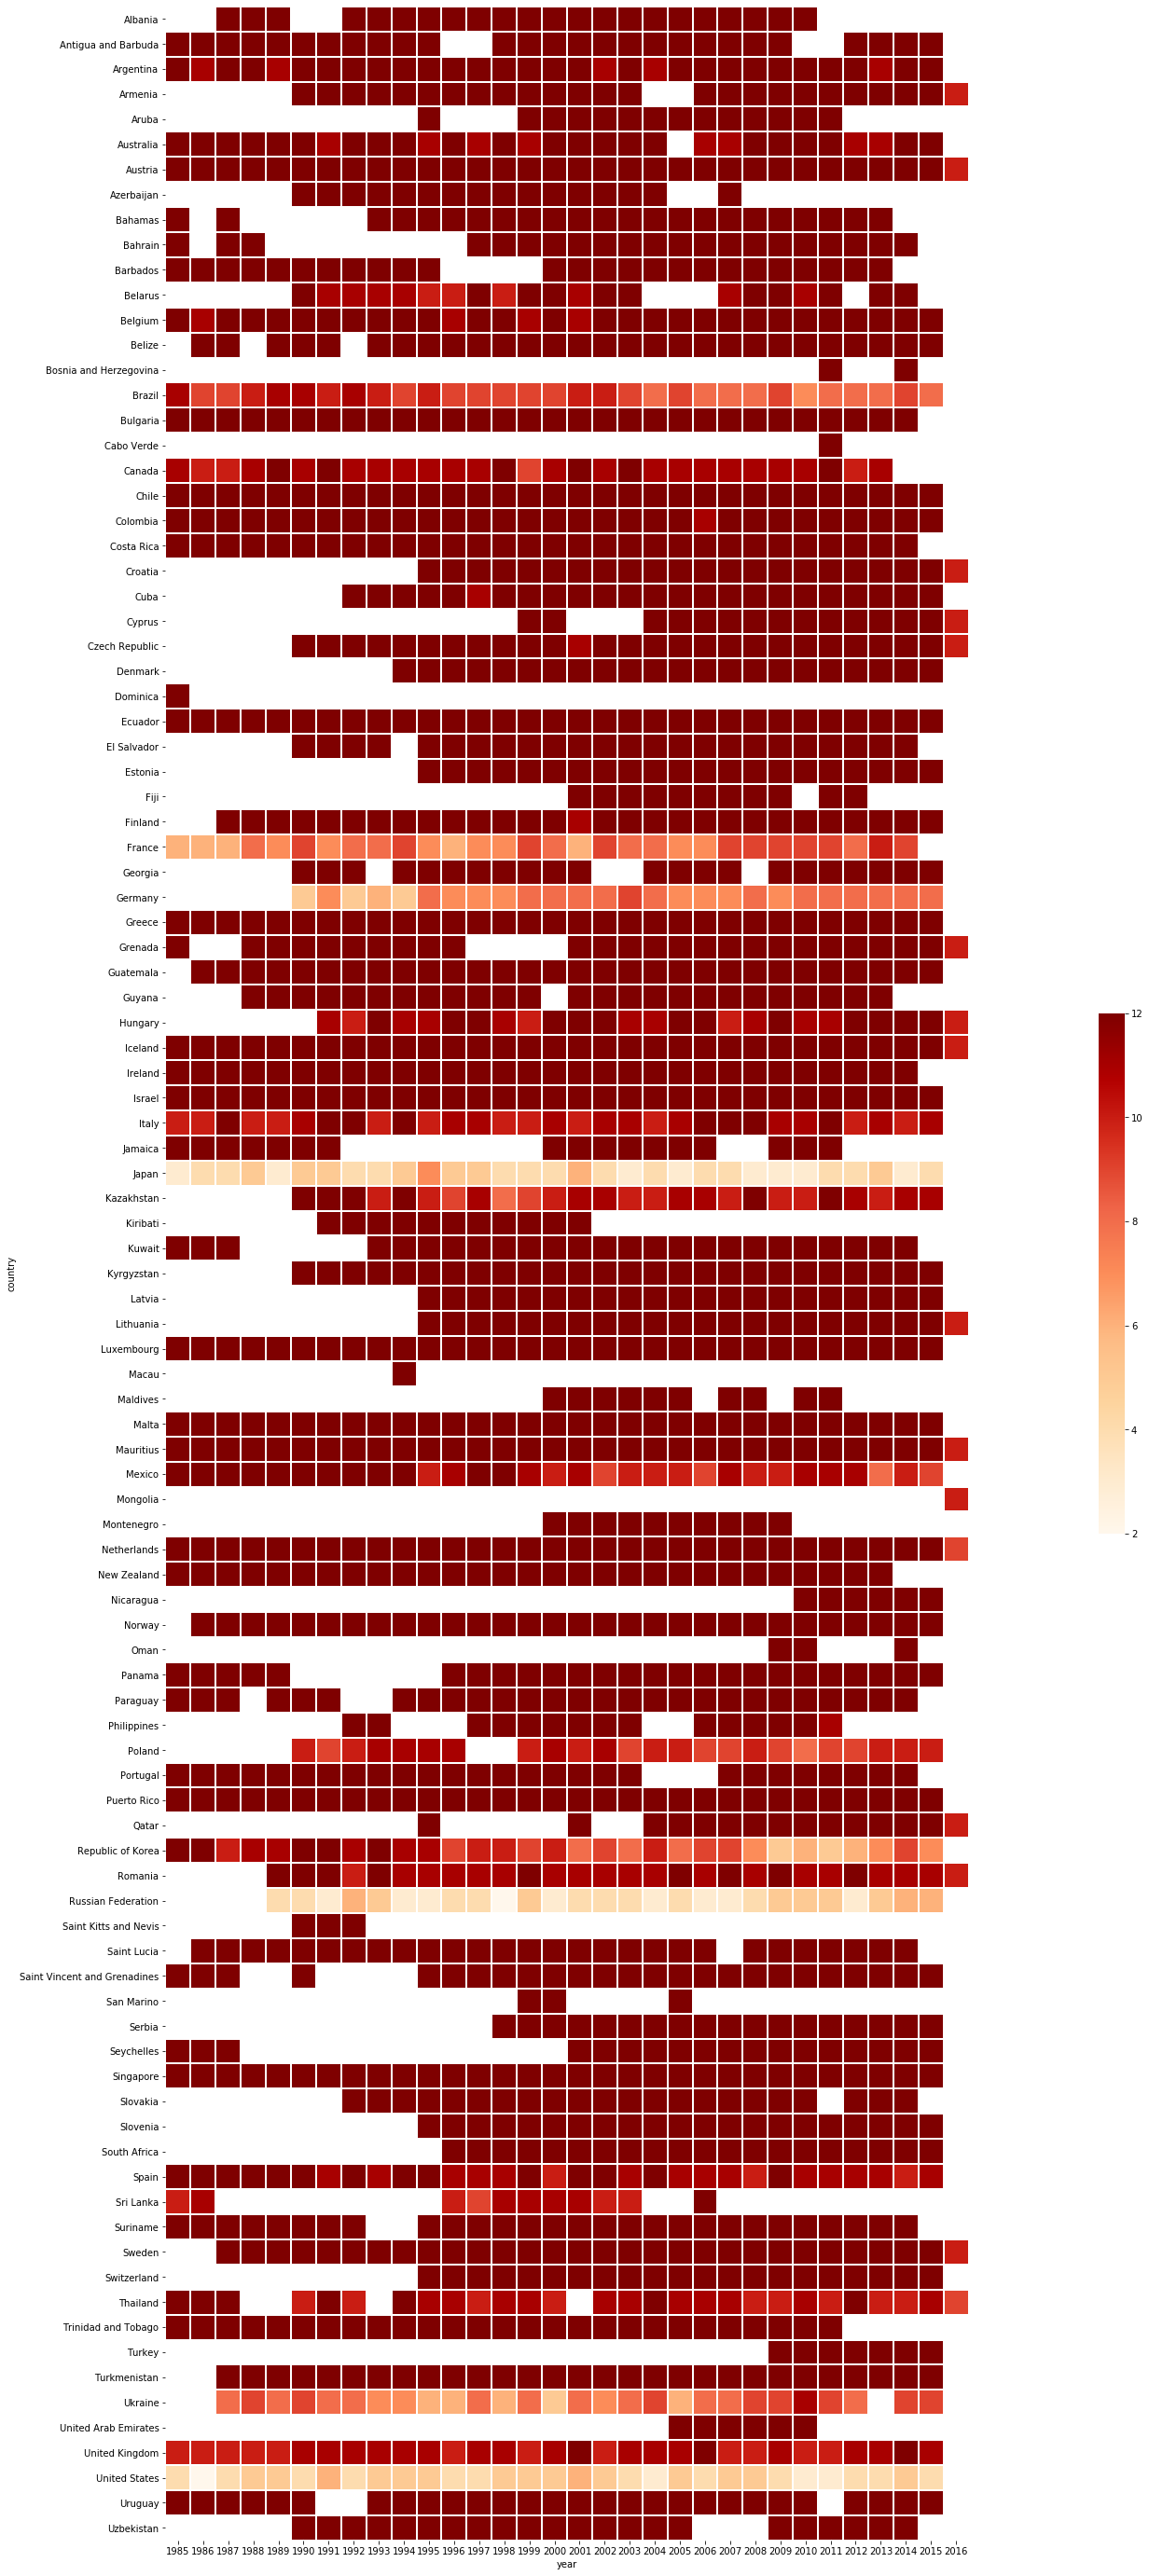

In [0]:
plt.figure(figsize=(50,50))
g = sns.heatmap(
    by_suicides_no, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Por meio da analise dos dados da base "Suicide Rates Overview 1985 to 2016" é possível concluir que a ocorrência de suicídios é maior entre homens do que entre mulheres, e que a faixa de idade de 35-54 anos é a mais suscetível à prática de tal ato. Outra conclusão possível de se inferir é que o suicidío ocorre com mais frequência nos países mais ricos, com PIB per capta mais elevado do que dos países subdesenvolvidos ou em desenvolvimento.
Para uma eventual apresentação dos dados, seria relevante chamar a atenção para o perfil do suicida em potencial: homem, adulto (com idade entre 35-54 anos) e originário de países desenvolvidos; ressaltando principalmente o último aspecto. Outro fato interessante é a evolução número de suicídios, nos países, ao longo dos anos. O gráfico que evidencia tais dados ilustra o fato de que o número de suícidios, ao longo dos anos, vem aumentando na maior parte dos países, o que só reforça a tese da Organização Mundial de Saúde de que se trata de um problema contemporâneo de saúde publica, que deve ser assim tratado pelas políticas públicas de saúde e educação.